<a href="https://colab.research.google.com/github/cleogrs/analytics/blob/main/Exercicio_Data_Visualization_Cleo_Gomes_da_Rocha_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Prático 1: Visualizando Dados Diferentes

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#importando csv saude
saude = pd.read_csv('/content/drive/MyDrive/saude.csv')

#cabeçalho
saude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10 non-null     int64 
 1   age     10 non-null     int64 
 2   height  10 non-null     int64 
 3   weight  10 non-null     int64 
 4   gender  10 non-null     object
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes


In [ ]:
saude.head(10)

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M
5,6,40,170,75,F
6,7,29,155,60,F
7,8,50,160,85,M
8,9,38,175,78,F
9,10,28,168,68,M


# Histograma de faixas etárias

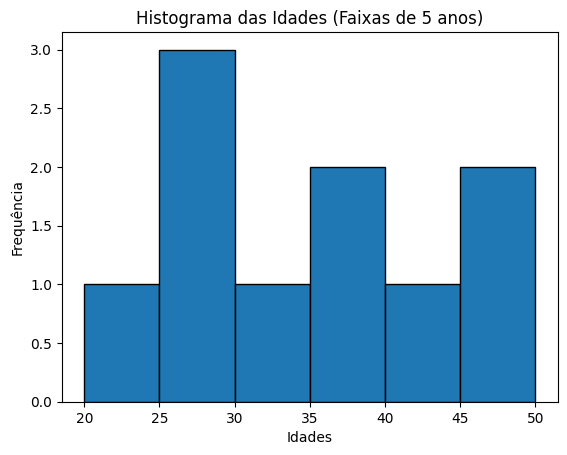

In [ ]:
bins = [20, 25, 30, 35, 40, 45, 50]

plt.hist(saude['age'], bins=bins, edgecolor='black')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.title('Histograma das Idades (Faixas de 5 anos)')
plt.xticks(bins)
plt.show()

# Scatterplot height x weight

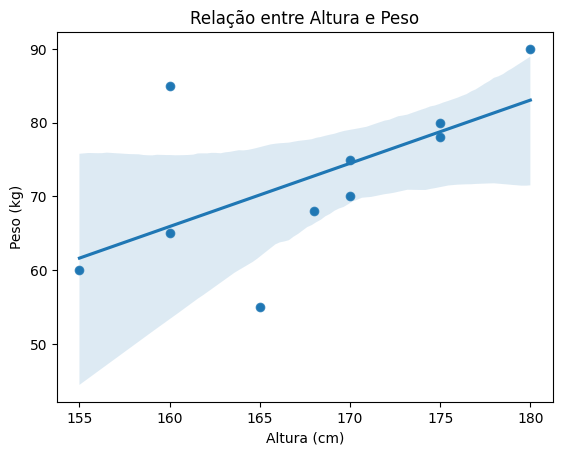

In [ ]:
sns.scatterplot(x=saude['height'], y=saude['weight'])
sns.regplot(x=saude['height'], y=saude['weight'])
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.title('Relação entre Altura e Peso')
plt.show()

# Gráfico Interativo de Gênero

In [ ]:
# Contando a frequência de cada gênero
gender_count = pd.Series(saude['gender']).value_counts().reset_index()
gender_count.columns = ['gender', 'count_gender']


bar = go.Figure(data=[go.Bar(x=gender_count['gender'], y=gender_count['count_gender'], width=0.4)])
bar.update_layout(
    xaxis_title='Gênero',
    yaxis_title='Frequência',
    title = 'Frequência por Gênero',
    width=400,
    height=400
)
bar.show()

# Desafio Prático 2: Séries Temporais


In [ ]:
#importando csv vendas
vendas = pd.read_csv('/content/drive/MyDrive/vendas.csv')

#cabeçalho
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    31 non-null     object
 1   sales   31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


# Gráfico de linhas das vendas ao longo do tempo

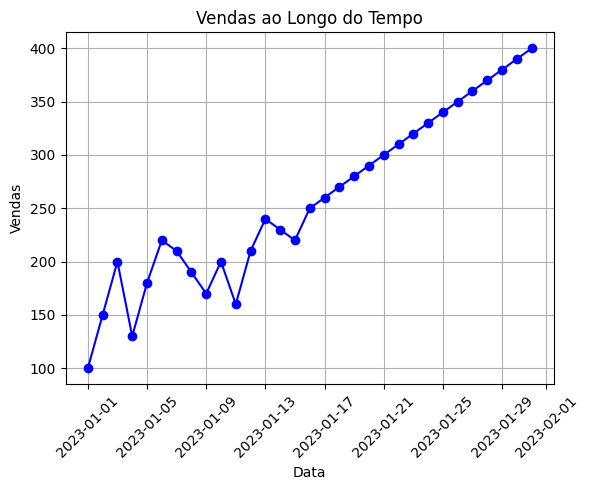

In [ ]:
# Converter a coluna 'data_string' para objetos de data
vendas['dates'] = pd.to_datetime(vendas['date'])


plt.figure(figsize=(6, 5))
plt.plot(vendas['dates'], vendas['sales'], marker='o', linestyle='-', color='b', label='Vendas')

# Configurando título e rótulos dos eixos
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')

# Formatando datas no eixo x
plt.xticks(rotation=45)

# Adicionando grade no gráfico
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# Gráfico de decomposição sazonal

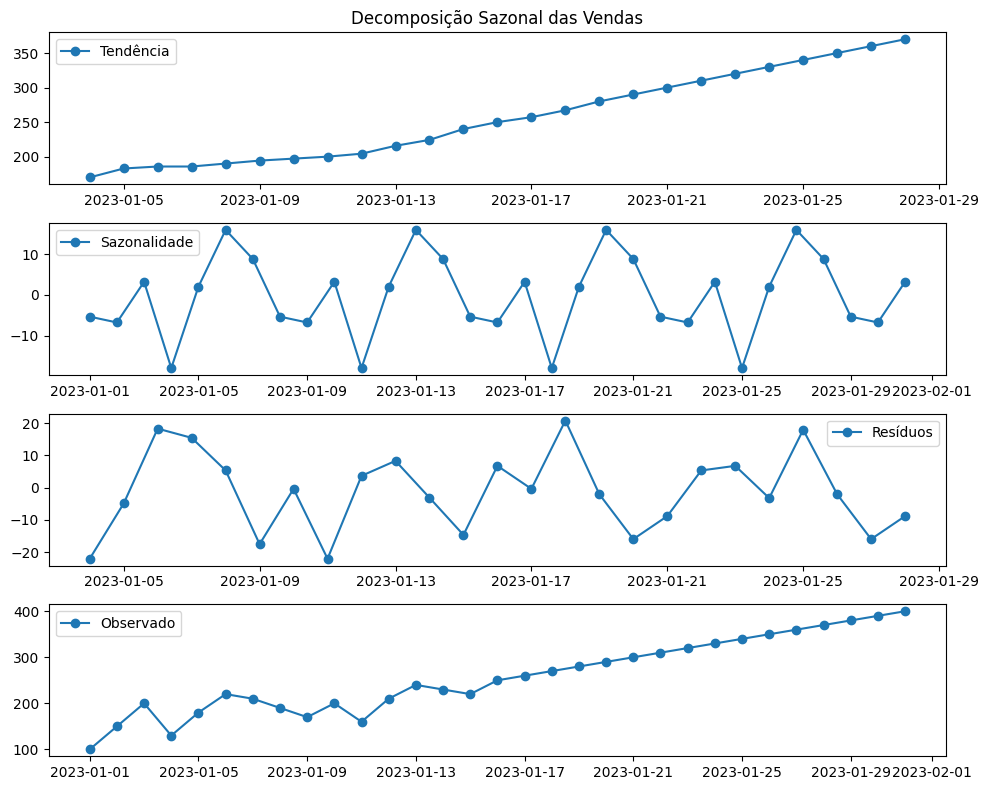

In [ ]:
vendas.set_index('dates', inplace=True)
results = seasonal_decompose(vendas['sales'], model='additive')

# Configurando o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Plotando a tendência
plt.subplot(411)
plt.plot(results.trend, label='Tendência', marker='o')
plt.legend(loc='best')
plt.title('Decomposição Sazonal das Vendas')

# Plotando a sazonalidade
plt.subplot(412)
plt.plot(results.seasonal, label='Sazonalidade', marker='o')
plt.legend(loc='best')

# Plotando os resíduos
plt.subplot(413)
plt.plot(results.resid, label='Resíduos', marker='o')
plt.legend(loc='best')

# Plotando a série observada
plt.subplot(414)
plt.plot(vendas['sales'], label='Observado', marker='o')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Gráfico interativo de vendas ao longo do tempo

In [ ]:
figure = px.line(vendas, x='dates', y='sales', title='Vendas ao Longo do Tempo')

# Configurações adicionais do layout
figure.update_layout(
    xaxis_title='Data',
    yaxis_title='Vendas',
    xaxis_tickformat='%b %Y',
    hovermode='x',
    width=600,
    height=500,
)

# Exibindo o gráfico interativo
figure.show()